In [1]:
import pandas as pd

### Reference dataset for Housing Market https://www.redfin.com/news/data-center/?msockid=0294473eccc4664c148a52a8cda567d3 -- National Region data
### Reference dataset for Unemployment https://www.bls.gov/charts/state-employment-and-unemployment/state-unemployment-rates-animated.htm# -- Gov data

In [2]:
df_housingMkt = pd.read_excel(r'state_market_tracker_1.xlsx',parse_dates=['PERIOD_BEGIN' ,'PERIOD_END'])

In [3]:
df_housingMkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39302 entries, 0 to 39301
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   PERIOD_BEGIN                    39302 non-null  datetime64[ns]
 1   PERIOD_END                      39302 non-null  datetime64[ns]
 2   PERIOD_DURATION                 39302 non-null  int64         
 3   REGION_TYPE                     39302 non-null  object        
 4   REGION_TYPE_ID                  39302 non-null  int64         
 5   TABLE_ID                        39302 non-null  int64         
 6   IS_SEASONALLY_ADJUSTED          39302 non-null  bool          
 7   REGION                          39302 non-null  object        
 8   CITY                            0 non-null      float64       
 9   STATE                           39302 non-null  object        
 10  STATE_CODE                      39302 non-null  object        
 11  PR

In [4]:
df_housingMkt.head(3)

,PERIOD_BEGIN,PERIOD_END,PERIOD_DURATION,REGION_TYPE,REGION_TYPE_ID,TABLE_ID,IS_SEASONALLY_ADJUSTED,REGION,CITY,STATE,...,SOLD_ABOVE_LIST_YOY,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,OFF_MARKET_IN_TWO_WEEKS,OFF_MARKET_IN_TWO_WEEKS_MOM,OFF_MARKET_IN_TWO_WEEKS_YOY,PARENT_METRO_REGION,PARENT_METRO_REGION_METRO_CODE,LAST_UPDATED
0,2022-08-01,2022-08-31,30,state,4,21,False,Georgia,NaN,Georgia,...,-0.137543,0.303005,0.032236,0.115019,0.345382,-0.052270,-0.122667,South Region,NaN,2025-04-18 10:40:47.550
1,2014-07-01,2014-07-31,30,state,4,50,False,Wyoming,NaN,Wyoming,...,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,West Region,NaN,2025-04-18 10:40:47.550
2,2020-01-01,2020-01-31,30,state,4,49,False,Minnesota,NaN,Minnesota,...,0.125000,0.300000,0.039130,0.152273,0.546207,0.199535,0.201222,Midwest Region,NaN,2025-04-18 10:40:47.550


In [5]:
df_housingMkt = df_housingMkt[['PERIOD_BEGIN','PERIOD_END','STATE','PARENT_METRO_REGION','STATE_CODE','MEDIAN_SALE_PRICE','HOMES_SOLD', 'INVENTORY']].copy()

In [6]:
df_housingMkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39302 entries, 0 to 39301
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PERIOD_BEGIN         39302 non-null  datetime64[ns]
 1   PERIOD_END           39302 non-null  datetime64[ns]
 2   STATE                39302 non-null  object        
 3   PARENT_METRO_REGION  39302 non-null  object        
 4   STATE_CODE           39302 non-null  object        
 5   MEDIAN_SALE_PRICE    39302 non-null  int64         
 6   HOMES_SOLD           39302 non-null  int64         
 7   INVENTORY            39219 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 2.4+ MB


In [7]:
df_housingMkt.rename(columns={'PARENT_METRO_REGION': 'REGION'}, inplace=True)

In [8]:
df_housingMkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39302 entries, 0 to 39301
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PERIOD_BEGIN       39302 non-null  datetime64[ns]
 1   PERIOD_END         39302 non-null  datetime64[ns]
 2   STATE              39302 non-null  object        
 3   REGION             39302 non-null  object        
 4   STATE_CODE         39302 non-null  object        
 5   MEDIAN_SALE_PRICE  39302 non-null  int64         
 6   HOMES_SOLD         39302 non-null  int64         
 7   INVENTORY          39219 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 2.4+ MB


In [9]:
# Create a new column with the numeric month
df_housingMkt['MONTH'] = df_housingMkt['PERIOD_BEGIN'].dt.month
# Create a new column with the numeric year
df_housingMkt['YEAR'] = df_housingMkt['PERIOD_BEGIN'].dt.year

In [10]:
df_housingMkt.head(10)

,PERIOD_BEGIN,PERIOD_END,STATE,REGION,STATE_CODE,MEDIAN_SALE_PRICE,HOMES_SOLD,INVENTORY,MONTH,YEAR
0,2022-08-01,2022-08-31,Georgia,South Region,GA,354700,13970,38874.0,8,2022
1,2014-07-01,2014-07-31,Wyoming,West Region,WY,168500,9,4.0,7,2014
2,2020-01-01,2020-01-31,Minnesota,Midwest Region,MN,258900,90,140.0,1,2020
3,2020-08-01,2020-08-31,Oklahoma,South Region,OK,197900,5247,9088.0,8,2020
4,2018-12-01,2018-12-31,Idaho,West Region,ID,353000,44,103.0,12,2018
5,2020-06-01,2020-06-30,Virginia,South Region,VA,271700,1040,1944.0,6,2020
6,2012-01-01,2012-01-31,Ohio,Midwest Region,OH,31600,154,2241.0,1,2012
7,2016-12-01,2016-12-31,Arkansas,South Region,AR,147700,2392,9832.0,12,2016
8,2018-03-01,2018-03-31,Ohio,Midwest Region,OH,148800,10271,33402.0,3,2018
9,2021-08-01,2021-08-31,Montana,West Region,MT,371500,99,322.0,8,2021


Cleaning up the Unemployment dataset.

In [11]:
df_unemployment = pd.read_csv(r'Unemployment in America Per US State.csv')

In [12]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29892 entries, 0 to 29891
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   FIPS Code                                                  29892 non-null  int64  
 1   State/Area                                                 29892 non-null  object 
 2   Year                                                       29892 non-null  int64  
 3   Month                                                      29892 non-null  int64  
 4   Total Civilian Non-Institutional Population in State/Area  29892 non-null  object 
 5   Total Civilian Labor Force in State/Area                   29892 non-null  object 
 6   Percent (%) of State/Area's Population                     29892 non-null  float64
 7   Total Employment in State/Area                             29892 non-null  object 
 8   Percen

In [13]:
#Convert column names to uppercase to easy merge datasets later.
df_unemployment.columns = df_unemployment.columns.str.upper()

In [14]:
#Drop FIPS column (will not need in the analysis)
df_unemployment.drop("FIPS CODE", axis=1, inplace=True)

In [15]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29892 entries, 0 to 29891
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   STATE/AREA                                                 29892 non-null  object 
 1   YEAR                                                       29892 non-null  int64  
 2   MONTH                                                      29892 non-null  int64  
 3   TOTAL CIVILIAN NON-INSTITUTIONAL POPULATION IN STATE/AREA  29892 non-null  object 
 4   TOTAL CIVILIAN LABOR FORCE IN STATE/AREA                   29892 non-null  object 
 5   PERCENT (%) OF STATE/AREA'S POPULATION                     29892 non-null  float64
 6   TOTAL EMPLOYMENT IN STATE/AREA                             29892 non-null  object 
 7   PERCENT (%) OF LABOR FORCE EMPLOYED IN STATE/AREA          29892 non-null  float64
 8   TOTAL 

In [16]:
#Find the time range for analysis on both datasets
minYearHouseMkt = df_housingMkt['YEAR'].min()
maxYearHouseMkt = df_housingMkt['YEAR'].max()
print("Housing Mkt minimum year:",minYearHouseMkt,"\nHousing Mkt maximum year:",maxYearHouseMkt)

minYearUnemployment = df_unemployment['YEAR'].min()
maxYearUnemployment = df_unemployment['YEAR'].max()
print("\nUnemployment minimum year:",minYearUnemployment,"\nUnemployment maximum year:",maxYearUnemployment)

#Amount of records before cleanup
print("\nHousing # of records before cleanup: ",df_housingMkt.shape[0])
print("Unemployment # of records before cleanup: ",df_unemployment.shape[0])

Housing Mkt minimum year: 2012 
Housing Mkt maximum year: 2025

Unemployment minimum year: 1976 
Unemployment maximum year: 2022

Housing # of records before cleanup:  39302
Unemployment # of records before cleanup:  29892


The new dataset should be between 2012 to 2022 to avoid NA entries when merged.

In [17]:
df_unemployment = df_unemployment[(df_unemployment['YEAR'] >= 2012) & (df_unemployment['YEAR'] <= 2022)]
df_housingMkt = df_housingMkt[(df_housingMkt['YEAR'] >= 2012) & (df_housingMkt['YEAR'] <= 2022)]

Lets validate the data is within new range.

In [18]:
#Find the time range for analysis on both datasets
minYearHouseMkt = df_housingMkt['YEAR'].min()
maxYearHouseMkt = df_housingMkt['YEAR'].max()
print("Housing Mkt minimum year:",minYearHouseMkt,"\nHousing Mkt maximum year:",maxYearHouseMkt)

minYearUnemployment = df_unemployment['YEAR'].min()
maxYearUnemployment = df_unemployment['YEAR'].max()
print("\nUnemployment minimum year:",minYearUnemployment,"\nUnemployment maximum year:",maxYearUnemployment)

#Amount of records after cleanup
print("\nHousing # of records after cleanup: ",df_housingMkt.shape[0])
print("Unemployment # of records before cleanup: ",df_unemployment.shape[0])

Housing Mkt minimum year: 2012 
Housing Mkt maximum year: 2022

Unemployment minimum year: 2012 
Unemployment maximum year: 2022

Housing # of records after cleanup:  32541
Unemployment # of records before cleanup:  6996


In [19]:
df_unemployment.head(3)

,STATE/AREA,YEAR,MONTH,TOTAL CIVILIAN NON-INSTITUTIONAL POPULATION IN STATE/AREA,TOTAL CIVILIAN LABOR FORCE IN STATE/AREA,PERCENT (%) OF STATE/AREA'S POPULATION,TOTAL EMPLOYMENT IN STATE/AREA,PERCENT (%) OF LABOR FORCE EMPLOYED IN STATE/AREA,TOTAL UNEMPLOYMENT IN STATE/AREA,PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA
22896,Alabama,2012,1,"3,736,437","2,179,750",58.3,"1,993,523",53.4,"186,227",8.5
22897,Alaska,2012,1,"532,472","365,200",68.6,"337,946",63.5,"27,254",7.5
22898,Arizona,2012,1,"4,970,220","3,048,161",61.3,"2,782,738",56.0,"265,423",8.7


In [20]:
df_unemployment.rename(columns={'STATE/AREA': 'STATE'}, inplace=True)

Lets merge the two datasets.

In [21]:
df_unemployment.head(3)

,STATE,YEAR,MONTH,TOTAL CIVILIAN NON-INSTITUTIONAL POPULATION IN STATE/AREA,TOTAL CIVILIAN LABOR FORCE IN STATE/AREA,PERCENT (%) OF STATE/AREA'S POPULATION,TOTAL EMPLOYMENT IN STATE/AREA,PERCENT (%) OF LABOR FORCE EMPLOYED IN STATE/AREA,TOTAL UNEMPLOYMENT IN STATE/AREA,PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA
22896,Alabama,2012,1,"3,736,437","2,179,750",58.3,"1,993,523",53.4,"186,227",8.5
22897,Alaska,2012,1,"532,472","365,200",68.6,"337,946",63.5,"27,254",7.5
22898,Arizona,2012,1,"4,970,220","3,048,161",61.3,"2,782,738",56.0,"265,423",8.7


In [22]:
df_housingMkt.head(3)

,PERIOD_BEGIN,PERIOD_END,STATE,REGION,STATE_CODE,MEDIAN_SALE_PRICE,HOMES_SOLD,INVENTORY,MONTH,YEAR
0,2022-08-01,2022-08-31,Georgia,South Region,GA,354700,13970,38874.0,8,2022
1,2014-07-01,2014-07-31,Wyoming,West Region,WY,168500,9,4.0,7,2014
2,2020-01-01,2020-01-31,Minnesota,Midwest Region,MN,258900,90,140.0,1,2020


In [23]:
#Merge both dataset
# Merge on State, Year, Month
merged_df = pd.merge(df_housingMkt, df_unemployment, on=['STATE', 'YEAR', 'MONTH'], how='inner')

In [24]:
merged_df.head(3)

,PERIOD_BEGIN,PERIOD_END,STATE,REGION,STATE_CODE,MEDIAN_SALE_PRICE,HOMES_SOLD,INVENTORY,MONTH,YEAR,TOTAL CIVILIAN NON-INSTITUTIONAL POPULATION IN STATE/AREA,TOTAL CIVILIAN LABOR FORCE IN STATE/AREA,PERCENT (%) OF STATE/AREA'S POPULATION,TOTAL EMPLOYMENT IN STATE/AREA,PERCENT (%) OF LABOR FORCE EMPLOYED IN STATE/AREA,TOTAL UNEMPLOYMENT IN STATE/AREA,PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA
0,2022-08-01,2022-08-31,Georgia,South Region,GA,354700,13970,38874.0,8,2022,"8,529,918","5,234,702",61.4,"5,073,755",59.5,"160,947",3.1
1,2022-08-01,2022-08-31,Georgia,South Region,GA,364600,12044,34156.0,8,2022,"8,529,918","5,234,702",61.4,"5,073,755",59.5,"160,947",3.1
2,2022-08-01,2022-08-31,Georgia,South Region,GA,345300,1099,2571.0,8,2022,"8,529,918","5,234,702",61.4,"5,073,755",59.5,"160,947",3.1


In [59]:
print("Null values in each column:\n", merged_df.isnull().sum())

Null values in each column:
 Unnamed: 0                                                   0
PERIOD_BEGIN                                                 0
PERIOD_END                                                   0
STATE                                                        0
REGION                                                       0
STATE_CODE                                                   0
MEDIAN_SALE_PRICE                                            0
HOMES_SOLD                                                   0
INVENTORY                                                    0
MONTH                                                        0
YEAR                                                         0
TOTAL CIVILIAN NON-INSTITUTIONAL POPULATION IN STATE/AREA    0
TOTAL CIVILIAN LABOR FORCE IN STATE/AREA                     0
PERCENT (%) OF STATE/AREA'S POPULATION                       0
TOTAL EMPLOYMENT IN STATE/AREA                               0
PERCENT (%) OF LABOR FORCE

In [26]:
print("Merged # of records: ", merged_df.shape[0])

Merged # of records:  31881


In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31881 entries, 0 to 31880
Data columns (total 17 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   PERIOD_BEGIN                                               31881 non-null  datetime64[ns]
 1   PERIOD_END                                                 31881 non-null  datetime64[ns]
 2   STATE                                                      31881 non-null  object        
 3   REGION                                                     31881 non-null  object        
 4   STATE_CODE                                                 31881 non-null  object        
 5   MEDIAN_SALE_PRICE                                          31881 non-null  int64         
 6   HOMES_SOLD                                                 31881 non-null  int64         
 7   INVENTORY                      

In [61]:
merged_df.to_excel("mergedUnemploymentxHousing_US.xlsx")

In [ ]:
merged_df = merged_df.dropna(subset=['INVENTORY'])

Data Visualizations

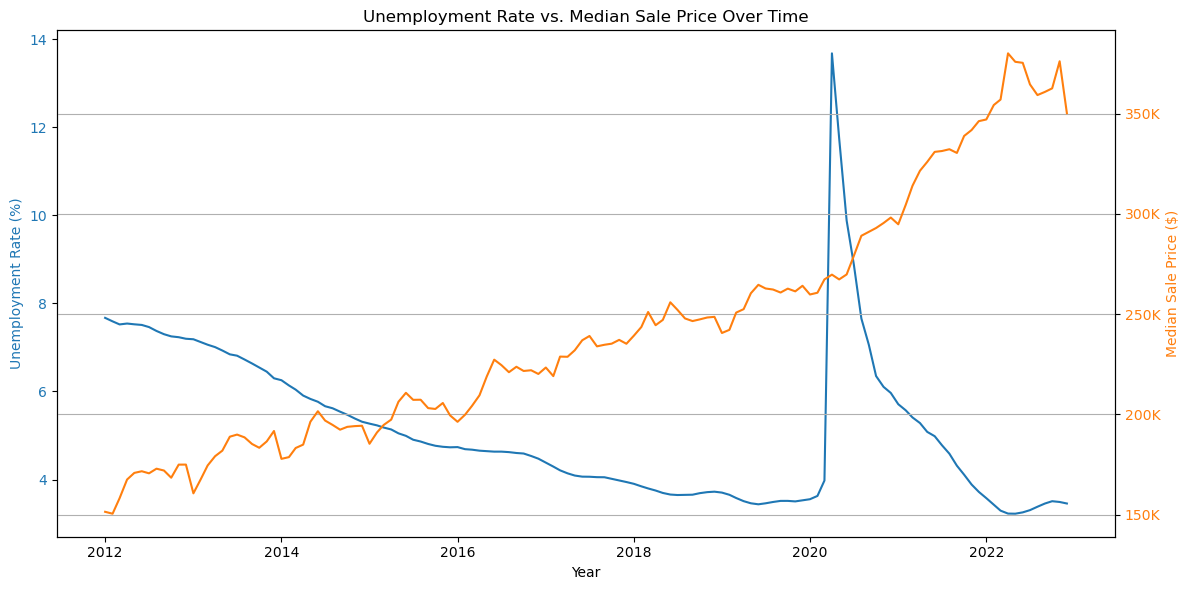

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group and average
df_merged_grouped = merged_df.groupby('PERIOD_BEGIN').agg({
    'PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA': 'mean',
    'MEDIAN_SALE_PRICE': 'mean'
}).reset_index()

# Plot the chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Unemployment rate (left Y-axis)
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax1.plot(df_merged_grouped['PERIOD_BEGIN'], df_merged_grouped['PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA'],
         color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Median sale price (right Y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Median Sale Price ($)', color='tab:orange')
ax2.plot(df_merged_grouped['PERIOD_BEGIN'], df_merged_grouped['MEDIAN_SALE_PRICE'], color='tab:orange')
# Format y-axis for median sale price to show in 'K' (thousands)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Unemployment Rate vs. Median Sale Price Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()



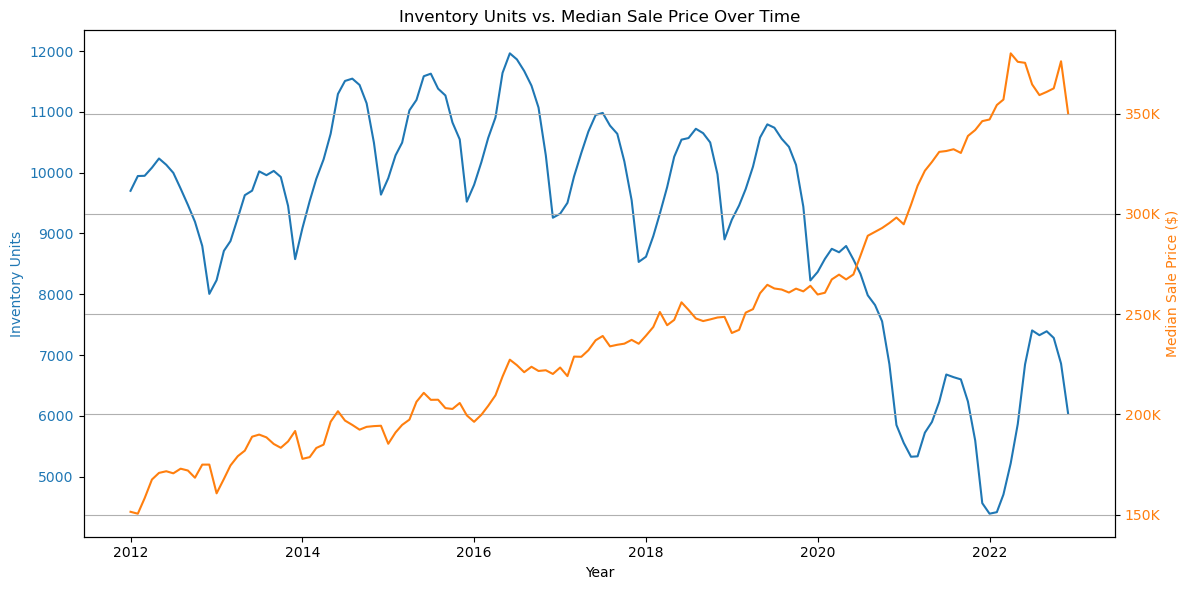

In [57]:
merged_df = merged_df.dropna(subset=['INVENTORY'])
df_merged_grouped = merged_df.groupby('PERIOD_BEGIN').agg({
    'INVENTORY': 'mean',
    'MEDIAN_SALE_PRICE': 'mean'
}).reset_index()

# Plot the chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Unemployment rate (left Y-axis)
ax1.set_xlabel('Year')
ax1.set_ylabel('Inventory Units', color='tab:blue')
ax1.plot(df_merged_grouped['PERIOD_BEGIN'], df_merged_grouped['INVENTORY'],
         color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Median sale price (right Y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Median Sale Price ($)', color='tab:orange')
ax2.plot(df_merged_grouped['PERIOD_BEGIN'], df_merged_grouped['MEDIAN_SALE_PRICE'], color='tab:orange')
# Format y-axis for median sale price to show in 'K' (thousands)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Inventory Units vs. Median Sale Price Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

A dual-axis line chart was used to compare the average unemployment rate and median home sale price over time. The chart shows that unemployment steadily declined from 2012 to 2020, while home prices increased consistently. In 2020, unemployment shows a spike which is possible due to COVID-19 meanwhile home prices continued to rise. This correlation analysis suggests that housing demand remained strong, possibly driven by low interest rates, remote work migration, and/or supply shortages.

Skewness of MEDIAN_SALE_PRICE: 2.78
Highly right-skewed


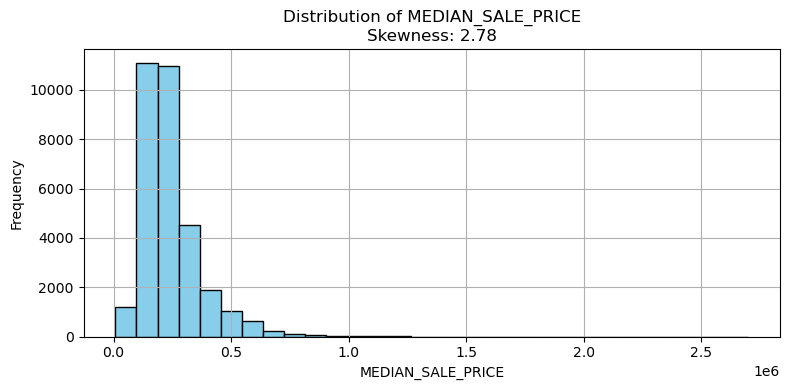

In [31]:
from scipy.stats import skew

# Drop missing values
df_medianSalePrice = merged_df['MEDIAN_SALE_PRICE'].dropna()

# Calculate skewness
skewness_value = skew(df_medianSalePrice)
print(f"Skewness of MEDIAN_SALE_PRICE: {skewness_value:.2f}")

# Interpret skewness
if skewness_value > 1:
    print("Highly right-skewed")
elif skewness_value > 0.5:
    print("Moderately right-skewed")
elif skewness_value < -1:
    print("Highly left-skewed")
elif skewness_value < -0.5:
    print("Moderately left-skewed")
else:
    print("Approximately symmetric")

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(df_medianSalePrice, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of MEDIAN_SALE_PRICE\nSkewness: {skewness_value:.2f}')
plt.xlabel('MEDIAN_SALE_PRICE')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Skewness of PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA: 1.99
Highly right-skewed


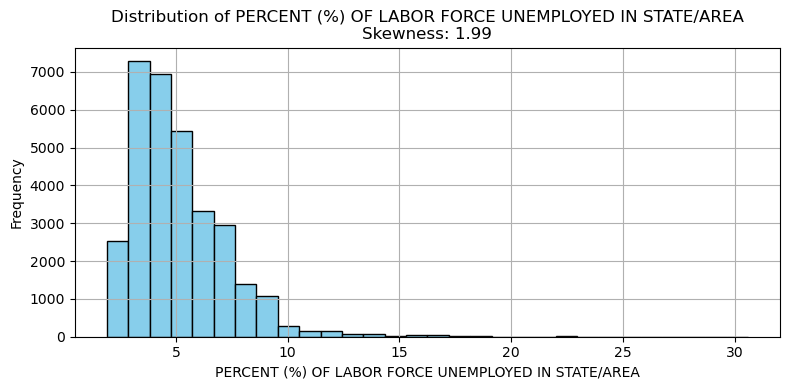

In [32]:

# Drop missing values
df_medianUnemployment = merged_df['PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA'].dropna()

# Calculate skewness
skewness_value = skew(df_medianUnemployment)
print(f"Skewness of PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA: {skewness_value:.2f}")

# Interpret skewness
if skewness_value > 1:
    print("Highly right-skewed")
elif skewness_value > 0.5:
    print("Moderately right-skewed")
elif skewness_value < -1:
    print("Highly left-skewed")
elif skewness_value < -0.5:
    print("Moderately left-skewed")
else:
    print("Approximately symmetric")

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(df_medianUnemployment, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA\nSkewness: {skewness_value:.2f}')
plt.xlabel('PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Both unemployment rate and median sale price are highly right-skewed, with most areas showing low unemployment and affordable housing, while outliers drive the distributions as with seen with long right tails in both graphs. This suggests that economic stability does not always equate to affordable housing,thereore, other factors like high-value properties, income inequality, and low housing inventory for sale might influence sale prices.

In [33]:
# Group by state and calculate average median sale price
top_states = merged_df.groupby('STATE')['MEDIAN_SALE_PRICE'].mean().sort_values(ascending=False).head(10)

# Display the result
print("Top 10 States by Average Median Sale Price:")
print(top_states)


Top 10 States by Average Median Sale Price:
STATE
Hawaii           603821.111111
California       547786.969697
Colorado         402238.636364
Massachusetts    396712.121212
Washington       389915.303030
New York         371267.727273
Wyoming          351020.751342
Oregon           314822.727273
Utah             307365.606061
Montana          305059.208262
Name: MEDIAN_SALE_PRICE, dtype: float64


In [34]:
# Group by state and calculate average unemployement in states
top_unemployement = merged_df.groupby('STATE')['PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA'].mean().sort_values(ascending=False).head(10)

# Display the result
print("Top 10 States by PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA:")
print(top_unemployement)

Top 10 States by PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA:
STATE
Nevada          7.442424
California      6.706061
Alaska          6.433333
Illinois        6.404545
Mississippi     6.400304
Rhode Island    6.233955
New Mexico      6.210703
Michigan        6.155957
New Jersey      6.077273
New York        6.046970
Name: PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA, dtype: float64


The data shows a weak correlation between unemployment and housing prices. Hawaii has the highest median sale price at $603,821 and is not listed for high unemployment meanwhile California has an average median sale price of $547,786 and an unemployment rate of 6.71%. Therefore, this suggests that areas with high unemployment such as Nevada (7.44%) and California can still experience high housing demand driven by factors such as technology industry or tourism. Furthermore, States with high unemployment such as Mississippi (6.40%) and New Mexico (6.21%) may face economic challenges impacting the housing market. Conversely, Utah (3.60%) shows a more balanced relationship between unemployment and home prices.

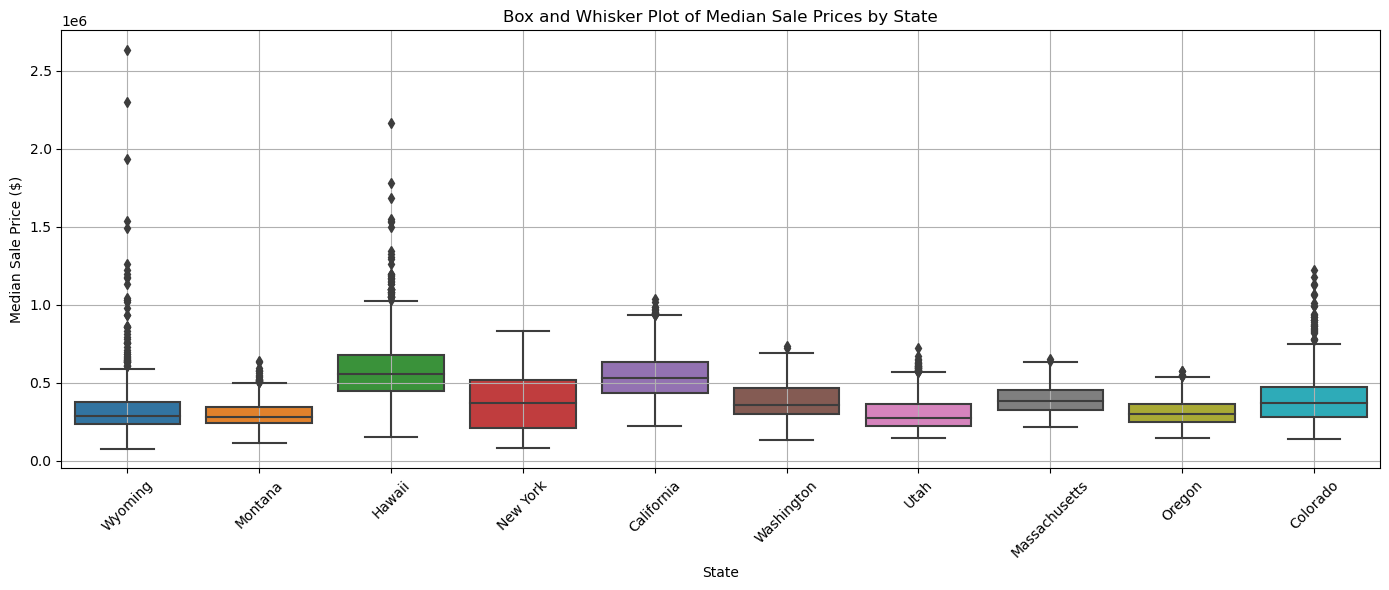

In [35]:
import seaborn as sns

top_states = merged_df.groupby('STATE')['MEDIAN_SALE_PRICE'].mean().sort_values(ascending=False).head(10).index
df_top = merged_df[merged_df['STATE'].isin(top_states)]

# Create boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='STATE', y='MEDIAN_SALE_PRICE')
plt.title('Box and Whisker Plot of Median Sale Prices by State')
plt.ylabel('Median Sale Price ($)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


The box plot reveals that while most states have a central cluster of home prices within a certain range, a few states such as Hawaii with a median price of $603,821 and California with $547,786 are heavily influenced by luxury properties in which drives up the overall local housing prices. In contrast, states such as Wyoming ($350,000) and Montana ($350,000) have more consistent lower prices, thus, suggesting a less competitive market. Additionally, States such as Colorado ($402,283) and Massachusetts ($396,711) show significant variability in home prices with outliers reaching up to $1.5 million or more in sale prices highlighting the disparities in medianhome prices due to factors like location, economic conditions, and demand.

In [36]:
import plotly.express as px

# Group by state abbreviation and calculate average home price
state_prices = merged_df.groupby('STATE_CODE', as_index=False)['MEDIAN_SALE_PRICE'].mean()

# Generate choropleth map
fig = px.choropleth(
    state_prices,
    locations='STATE_CODE',
    locationmode='USA-states',
    color='MEDIAN_SALE_PRICE',
    scope='usa',
    color_continuous_scale='Plasma',
    labels={'MEDIAN_SALE_PRICE': 'Avg Home Price'},
    title='Average Median Home Sale Price by U.S. State'
)

fig.show()


The map shows U.S. median home sale prices following with dark purple indicating the highest prices in states like California, New York, and Hawaii then Yellow represents states with the lowest prices such as West Virginia and Mississippi. Furthermore, the map graph highlights regional disparities, with coastal areas having more expensive housing.

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31881 entries, 0 to 31880
Data columns (total 17 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   PERIOD_BEGIN                                               31881 non-null  datetime64[ns]
 1   PERIOD_END                                                 31881 non-null  datetime64[ns]
 2   STATE                                                      31881 non-null  object        
 3   REGION                                                     31881 non-null  object        
 4   STATE_CODE                                                 31881 non-null  object        
 5   MEDIAN_SALE_PRICE                                          31881 non-null  int64         
 6   HOMES_SOLD                                                 31881 non-null  int64         
 7   INVENTORY                      

In [49]:
merged_df = pd.read_excel("mergedUnemploymentxHousing_US.xlsx")

In [52]:
def calculate_pvalues(df):
    """Calculate a DataFrame of p-values for Pearson correlation."""
    df = df.select_dtypes(include=[np.number])  # Keep only numeric columns
    cols = df.columns
    pvalues = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                x = df[[col1, col2]].dropna()
                if len(x) >= 2:  # Need at least 2 points
                    _, p = pearsonr(x[col1], x[col2])
                    pvalues.loc[col1, col2] = p
                else:
                    pvalues.loc[col1, col2] = np.nan
            else:
                pvalues.loc[col1, col2] = 0.0

    return pvalues


In [53]:
pval_matrix = calculate_pvalues(merged_df)

In [55]:
pval_matrix

,Unnamed: 0,MEDIAN_SALE_PRICE,HOMES_SOLD,INVENTORY,MONTH,YEAR,PERCENT (%) OF STATE/AREA'S POPULATION,PERCENT (%) OF LABOR FORCE EMPLOYED IN STATE/AREA,PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA
Unnamed: 0,0.000000,6.500908e-01,2.258784e-01,3.910819e-01,2.249500e-01,1.262179e-03,1.094152e-01,5.454683e-02,1.162265e-01
MEDIAN_SALE_PRICE,0.650091,0.000000e+00,1.276751e-156,1.231102e-12,9.518773e-18,0.000000e+00,1.954913e-05,6.949678e-26,3.007357e-111
HOMES_SOLD,0.225878,1.276751e-156,0.000000e+00,0.000000e+00,2.988145e-09,1.321577e-40,5.598571e-48,1.057403e-55,1.109908e-20
INVENTORY,0.391082,1.231102e-12,0.000000e+00,0.000000e+00,5.042151e-01,1.048487e-36,3.929248e-62,2.041914e-86,3.768909e-59
MONTH,0.224950,9.518773e-18,2.988145e-09,5.042151e-01,0.000000e+00,5.453835e-01,3.016686e-03,3.660451e-01,3.722182e-29
YEAR,0.001262,0.000000e+00,1.321577e-40,1.048487e-36,5.453835e-01,0.000000e+00,1.440069e-122,6.699972e-01,0.000000e+00
PERCENT (%) OF STATE/AREA'S POPULATION,0.109415,1.954913e-05,5.598571e-48,3.929248e-62,3.016686e-03,1.440069e-122,0.000000e+00,0.000000e+00,0.000000e+00
PERCENT (%) OF LABOR FORCE EMPLOYED IN STATE/AREA,0.054547,6.949678e-26,1.057403e-55,2.041914e-86,3.660451e-01,6.699972e-01,0.000000e+00,0.000000e+00,0.000000e+00
PERCENT (%) OF LABOR FORCE UNEMPLOYED IN STATE/AREA,0.116226,3.007357e-111,1.109908e-20,3.768909e-59,3.722182e-29,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


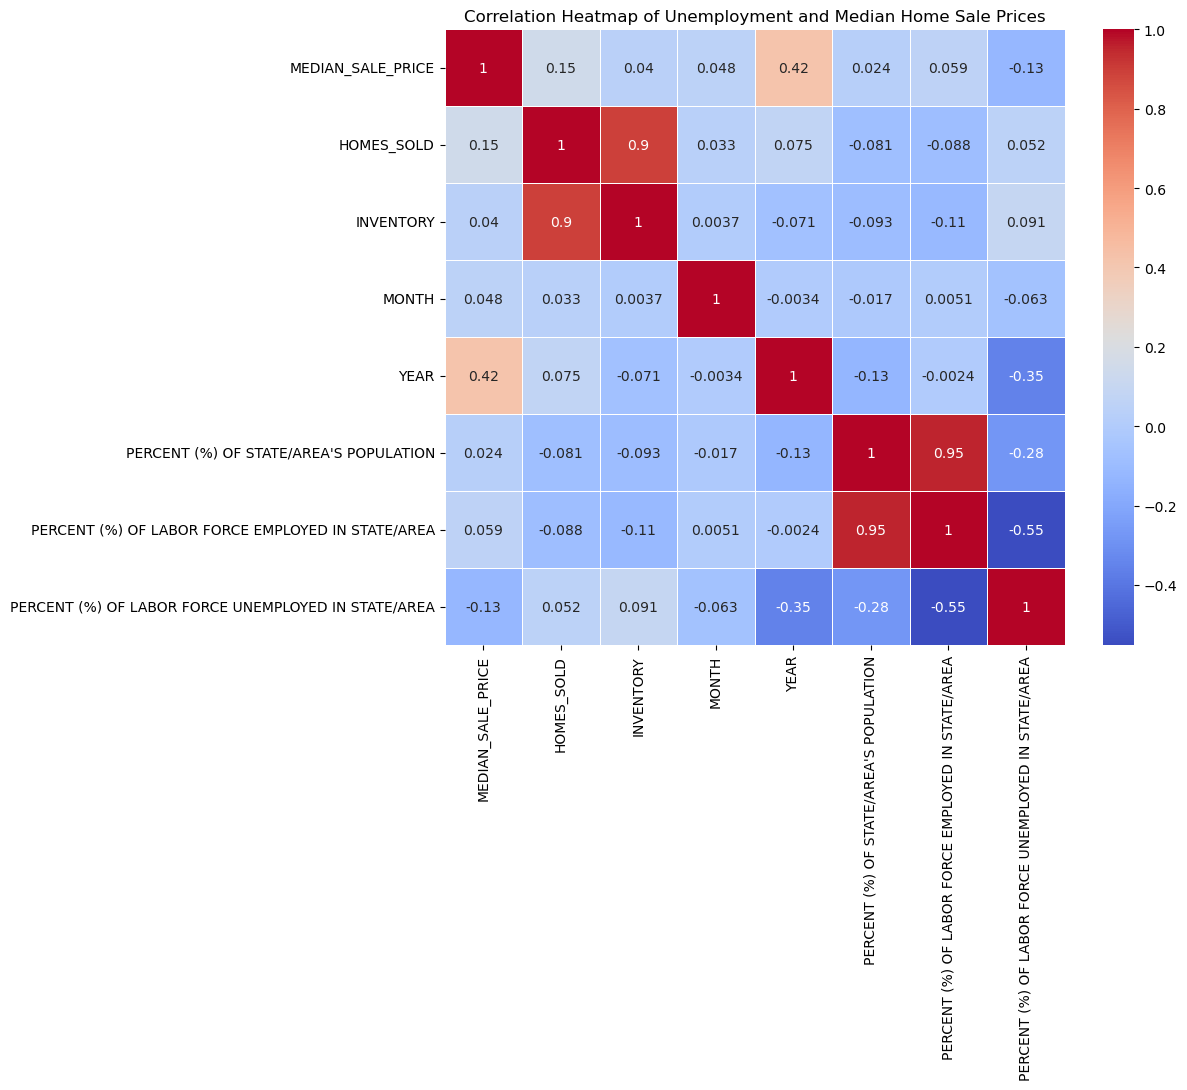

In [45]:
# Assuming merged_df is your DataFrame
# Select only numeric columns
numeric_df = merged_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Unemployment and Median Home Sale Prices')

# Show the plot
plt.show()


A heatmap reveals the relationship between variables in a dataset and its respective correlation to one another. For the merged dataset, we can observe the relationships between unemployment and median home sale prices with more in-depth details.

The median sale price shows a moderate positive correlation with the year (0.42),thus, suggesting rising prices over time. Furthermore, we can observe a weak negative correlation with unemployment (−0.13) indicating a slight decrease in home prices with higher unemployment. For this, the percent of labor force employed has a strong positive correlation with the state’s population (0.95) and a moderate negative correlation with unemployment (−0.28). Finally, we can observe that the number of homes sold show weak correlations with most other variables. 

Overall, unemployment rates and housing prices show mild inverse correlations, with time likely contributing to rising prices.

Obs: The key driver for the rise in median sale price appears to be the year, with a moderate positive correlation of 0.42. This suggests that over time, home prices are rising, likely due to factors such as inflation, increased demand, or economic growth.